In [244]:
# Librerías necesarias
import pandas as pd
import numpy as np

#import seaborn as sns
#from sklearn.model_selection import train_test_split
# Las comentadas son para futuro uso pero aún no son están en uso

In [245]:
# Nota  
#Este notebook requiere tener instaladas las siguientes librerías:  
#`pandas`, `numpy`, `matplotlib`, `seaborn`, `scikit-learn`, `notebook`  
#Si no las tienes, ejecuta en la terminal:
#`pip install pandas numpy matplotlib seaborn scikit-learn notebook`

In [246]:
#Lee el archivo de la database
df = pd.read_csv("stroke-dataset.csv")


#Exploración de datos

In [247]:
#Vista de los primeros datos
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [248]:
#Muestra el tipo de dato de cada atributo
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [249]:
#Verifica la cantidad de datos NaN según categoría
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [258]:
#Muestra si se conoce o no si es que fuma
fumadores_desconocidos = df[df["smoking_status"] == "Unknown"]
print(fumadores_desconocidos)
print((df["smoking_status"] == "Unknown").sum())

In [250]:
#Verificar si hay alguna edad sin sentido (outliers)
print("Edad máxima:", df['age'].max())
print("Edad minima:", df['age'].min())

Edad máxima: 82.0
Edad minima: 0.08


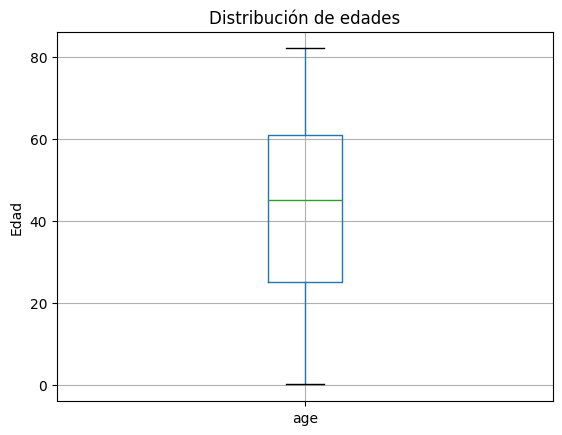

In [251]:
#pip install matplotlib 
#Verificar outliers edad
import matplotlib.pyplot as plt
df.boxplot(column='age')
plt.title('Distribución de edades')
plt.ylabel('Edad')

plt.show()

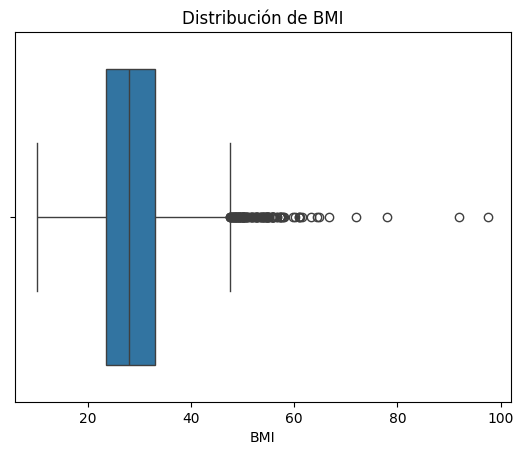

In [252]:
import seaborn as sns

sns.boxplot(x=df['bmi'])
plt.title('Distribución de BMI')
plt.xlabel('BMI')
plt.show()


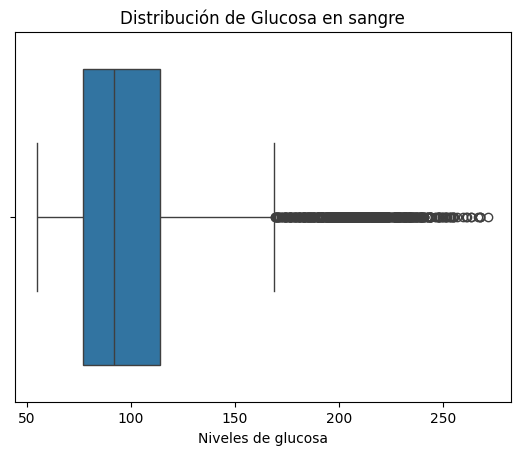

In [253]:
sns.boxplot(x=df['avg_glucose_level'])
plt.title('Distribución de Glucosa en sangre')
plt.xlabel('Niveles de glucosa')
plt.show()


#Limpieza del dataset

In [ ]:
#Cantidad de filas en el dataset antes de eliminación de NaN
len(df) 

5110

In [ ]:
#Eliminar filas que contienen valores NaN  
df = df.dropna(axis=0)

In [ ]:
#Cantidad de filas en el dataset post eliminación de NaN
len(df)

4909

In [ ]:
#Revisar si hay datos duplicados (no los borra en caso de existir)
duplicados = df.duplicated()
print(df[duplicados])

Empty DataFrame
Columns: [id, gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke]
Index: []


In [ ]:
#Cantidad de filas antes de borrar outliers BMI
len(df) 

4909

In [ ]:
#Mostrar outliers BMI
Q1 = df["bmi"].quantile(0.25)
Q3 = df["bmi"].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
print(limite_inferior, limite_superior)
outliers = df[(df["bmi"] < limite_inferior) | (df["bmi"] > limite_superior)]
print(outliers)


df_sin = df[(df["bmi"] >= limite_inferior) & (df["bmi"] <= limite_superior)]

9.099999999999998 47.5
         id  gender   age  hypertension  heart_disease ever_married  \
21    13861  Female  52.0             1              0          Yes   
113   41069  Female  45.0             0              0          Yes   
254   32257  Female  47.0             0              0          Yes   
258   28674  Female  74.0             1              0          Yes   
270   72911  Female  57.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
4858   1696  Female  43.0             0              0          Yes   
4906  72696  Female  53.0             0              0          Yes   
4952  16245    Male  51.0             1              0          Yes   
5009  40732  Female  50.0             0              0          Yes   
5057  38349  Female  49.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
21    Self-employed          Urban          

In [ ]:
#Cantidad de filas después de borrar outliers BMI
len(df_sin) 

4799

In [ ]:
#Mostrar outliers
Q1 = df["avg_glucose_level"].quantile(0.25)
Q3 = df["avg_glucose_level"].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
print(limite_inferior, limite_superior)
outliers = df[(df["avg_glucose_level"] < limite_inferior) | (df["avg_glucose_level"] > limite_superior)]

print(outliers)

df_sin = df_sin[(df["avg_glucose_level"] >= limite_inferior) & (df["avg_glucose_level"] <= limite_superior)]

22.319999999999993 168.32
         id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
5     56669    Male  81.0             0              0          Yes   
14     5317  Female  79.0             0              1          Yes   
...     ...     ...   ...           ...            ...          ...   
5061  38009    Male  41.0             0              0          Yes   
5062  11184  Female  82.0             0              0          Yes   
5063  68967    Male  39.0             0              0          Yes   
5064  66684    Male  70.0             0              0          Yes   
5076  39935  Female  34.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban       

C:\Users\gabol\AppData\Local\Temp\ipykernel_6584\3680756589.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_sin = df_sin[(df["avg_glucose_level"] >= limite_inferior) & (df["avg_glucose_level"] <= limite_superior)]


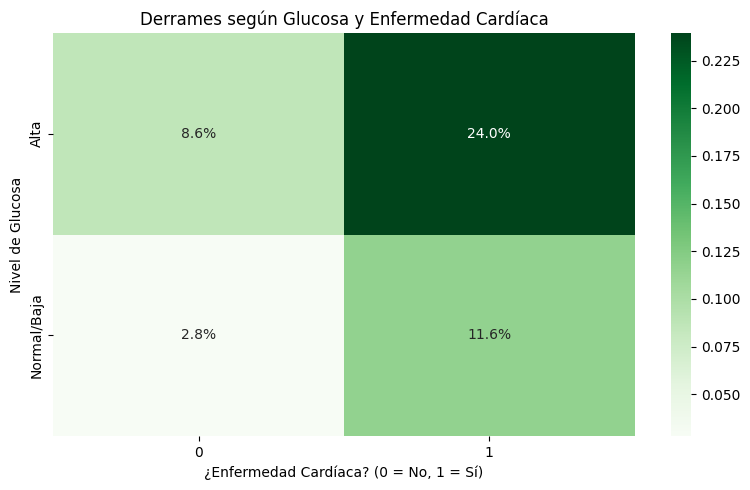

In [ ]:
df_grafico = df.copy()
df_grafico['glucosa_cat'] = np.where(df_grafico['avg_glucose_level'] > 140, 'Alta', 'Normal/Baja')

prop_glucosa_heart = df_grafico.groupby(['glucosa_cat', 'heart_disease'], observed=True)['stroke'].mean()
prop_glucosa_heart = prop_glucosa_heart.unstack()

plt.figure(figsize=(8, 5))
sns.heatmap(prop_glucosa_heart, cmap="Greens", annot=True, fmt=".1%")
plt.title("Derrames según Glucosa y Enfermedad Cardíaca")
plt.xlabel("¿Enfermedad Cardíaca? (0 = No, 1 = Sí)")
plt.ylabel("Nivel de Glucosa")
plt.tight_layout()
plt.show()

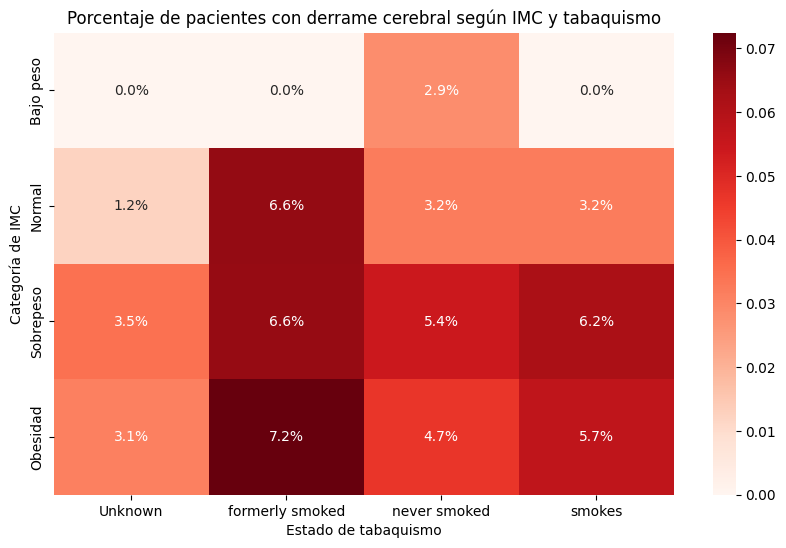

In [ ]:
df_grafico = df.copy()
bins = [0, 18.5, 24.9, 29.9, 100]  # el 100 es un tope alto por si acaso
labels = ['Bajo peso', 'Normal', 'Sobrepeso', 'Obesidad']
df_grafico['bmi_cat'] = pd.cut(df_grafico['bmi'], bins=bins, labels=labels)
prop_por_combo = df_grafico.groupby(['bmi_cat', 'smoking_status'], observed=True)['stroke'].mean()
prop_por_combo = prop_por_combo.unstack()
plt.figure(figsize=(10,6))
sns.heatmap(prop_por_combo, cmap="Reds", annot=True, fmt=".1%", cbar=True)
plt.title("Porcentaje de pacientes con derrame cerebral según IMC y tabaquismo")
plt.xlabel("Estado de tabaquismo")
plt.ylabel("Categoría de IMC")
plt.show()

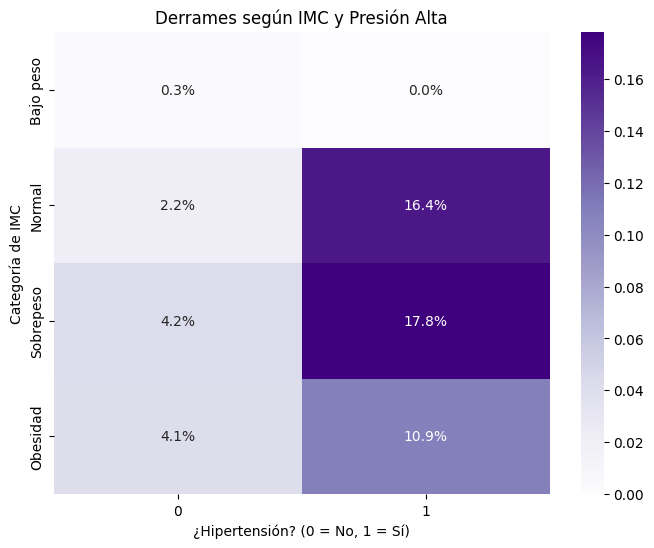

In [ ]:
prop_bmi_hyper = df_grafico.groupby(['bmi_cat', 'hypertension'], observed=True)['stroke'].mean()
prop_bmi_hyper = prop_bmi_hyper.unstack()

# Mapa de calor
plt.figure(figsize=(8,6))
sns.heatmap(prop_bmi_hyper, cmap="Purples", annot=True, fmt=".1%")
plt.title("Derrames según IMC y Presión Alta")
plt.xlabel("¿Hipertensión? (0 = No, 1 = Sí)")
plt.ylabel("Categoría de IMC")
plt.show()

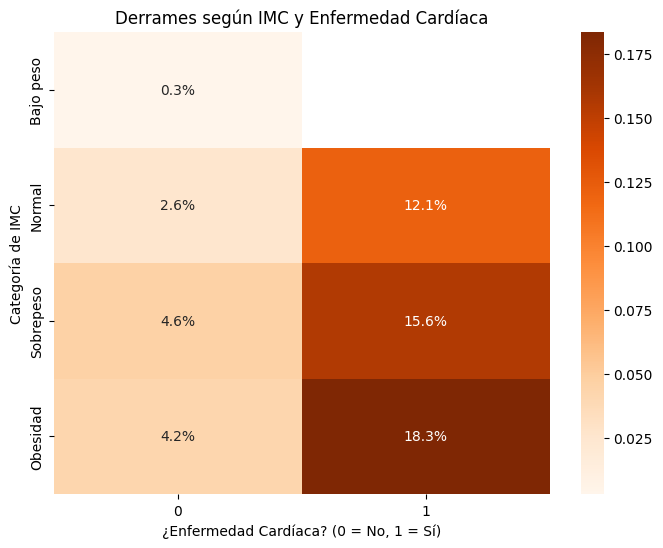

In [ ]:
# Agrupar por IMC y enfermedad cardíaca
prop_bmi_heart = df_grafico.groupby(['bmi_cat', 'heart_disease'], observed=True)['stroke'].mean()
prop_bmi_heart = prop_bmi_heart.unstack()

# Mapa de calor
plt.figure(figsize=(8,6))
sns.heatmap(prop_bmi_heart, cmap="Oranges", annot=True, fmt=".1%")
plt.title("Derrames según IMC y Enfermedad Cardíaca")
plt.xlabel("¿Enfermedad Cardíaca? (0 = No, 1 = Sí)")
plt.ylabel("Categoría de IMC")
plt.show()


Decimos quedarnos con las variables:
- glucosa
- bmi
- edad
- Enfermedad cardiaca

In [ ]:
#Mediana
df.groupby('stroke')[['age', 'avg_glucose_level', 'bmi', 'heart_disease']].median()

,age,avg_glucose_level,bmi,heart_disease
stroke,,,,
0,43.0,91.21,28.0,0.0
1,70.0,106.58,29.7,0.0


In [ ]:
pd.crosstab(df['stroke'], df['hypertension'], normalize='index')

hypertension,0,1
stroke,,
0,0.916809,0.083191
1,0.712919,0.287081


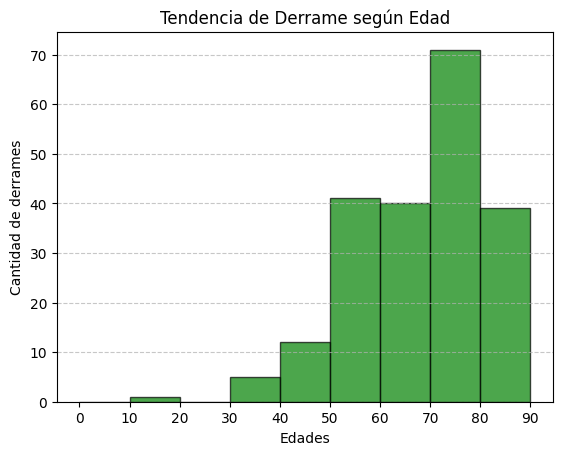

In [ ]:
#Nos ayudará para separar a los que si han tenido un derrame
df_stroke = df[df["stroke"] == 1]

bins = list(range(0, 100, 10))
plt.hist(df_stroke["age"], bins=bins, edgecolor="black", alpha=0.7, color='green')
plt.title('Tendencia de Derrame según Edad')
plt.xlabel('Edades')
plt.ylabel('Cantidad de derrames')
plt.xticks(bins)  
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


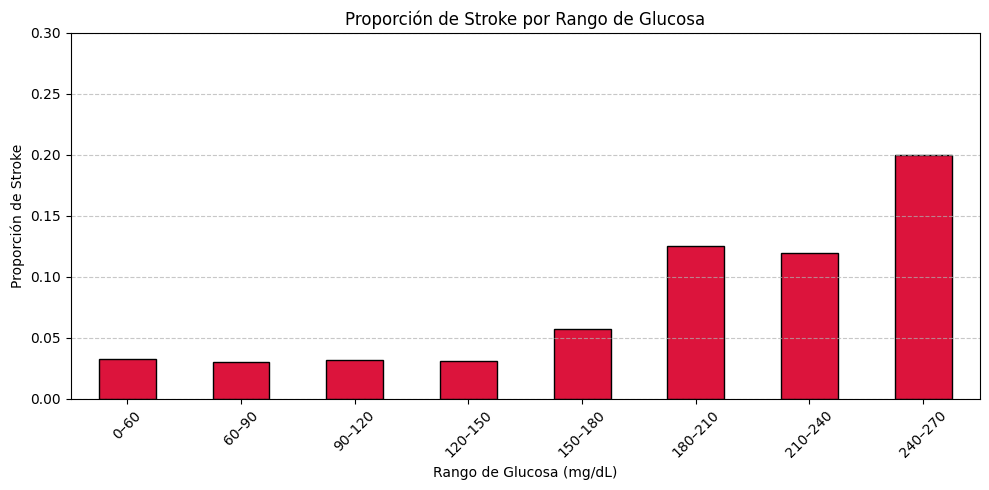

In [ ]:
bins = [0, 60, 90, 120, 150, 180, 210, 240, 270]
labels = [f'{bins[i]}–{bins[i+1]}' for i in range(len(bins)-1)]

# Creamos columna con los cortes
df['glucose_bin'] = pd.cut(df['avg_glucose_level'], bins=bins, labels=labels, right=False)

# Calculamos la proporción de stroke por bin
stroke_rates = df.groupby('glucose_bin', observed=True)['stroke'].mean()


plt.figure(figsize=(10, 5))
stroke_rates.plot(kind='bar', color='crimson', edgecolor='black')
plt.title('Proporción de Stroke por Rango de Glucosa')
plt.xlabel('Rango de Glucosa (mg/dL)')
plt.ylabel('Proporción de Stroke')
plt.ylim(0, 0.3)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#Calcular medidas de tendencia central, desviación estándar y varianza  de las variables
media = df[['avg_glucose_level', 'bmi', 'age', 'heart_disease']].mean()
mediana = df[['avg_glucose_level', 'bmi', 'age']].median()
moda = df[['avg_glucose_level', 'bmi', 'age', 'heart_disease']].mode()
desviacion_estandar = df[['avg_glucose_level', 'bmi', 'age', 'heart_disease']].std()
varianza=df[['avg_glucose_level','bmi','age','heart_disease']].var()



print("Media:\n", media)
print("\nMediana:\n", mediana)
print("\nModa:\n", moda)
print("\nDesviación estándar:\n", desviacion_estandar)
print("\nVarianza:\n",varianza )

Media:
 avg_glucose_level    105.305150
bmi                   28.893237
age                   42.865374
heart_disease          0.049501
dtype: float64

Mediana:
 avg_glucose_level    91.68
bmi                  28.10
age                  44.00
dtype: float64

Moda:
    avg_glucose_level   bmi   age  heart_disease
0              93.88  28.7  57.0            0.0
1                NaN   NaN  78.0            NaN

Desviación estándar:
 avg_glucose_level    44.424341
bmi                   7.854067
age                  22.555115
heart_disease         0.216934
dtype: float64


In [ ]:
#Calcular desviación estándar y varianza de las variables


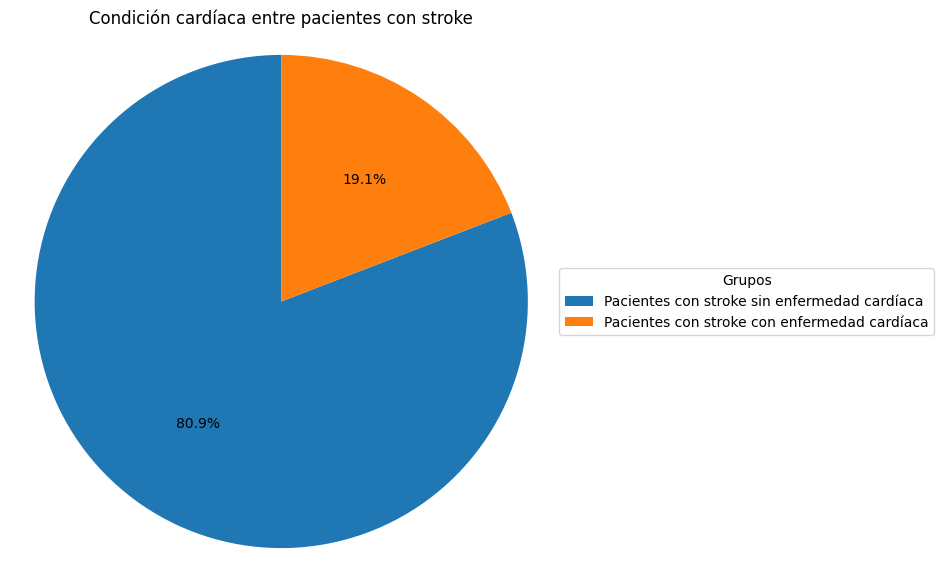

In [ ]:
def clasificar(row):
    if row['heart_disease'] == 0:
        return "No condición cardíaca"
    else:
        return "Condición cardíaca"

# Filtramos solo las personas que han sufrido un stroke
con_stroke = df[df['stroke'] == 1]

# Contamos cuántos tienen o no tienen enfermedad cardíaca dentro del grupo de stroke
heart_cond_counts = con_stroke['heart_disease'].value_counts()

# Asignamos etiquetas legibles
labels = ["Sin condición cardíaca", "Con condición cardíaca"]

# Creamos el gráfico de torta
plt.figure(figsize=(7, 7))  # Ajustar tamaño para mejor visualización
wedges, texts, autotexts = plt.pie(heart_cond_counts, autopct="%0.1f%%", startangle=90)

# Agregar leyenda con descripciones claras
plt.legend(wedges, 
           ["Pacientes con stroke sin enfermedad cardíaca", "Pacientes con stroke con enfermedad cardíaca"], 
           title="Grupos", loc="center left", bbox_to_anchor=(1, 0.5))

# Agregar título y mantener la forma circular
plt.title("Condición cardíaca entre pacientes con stroke")
plt.axis('equal')

# Mostrar gráfico
plt.show()

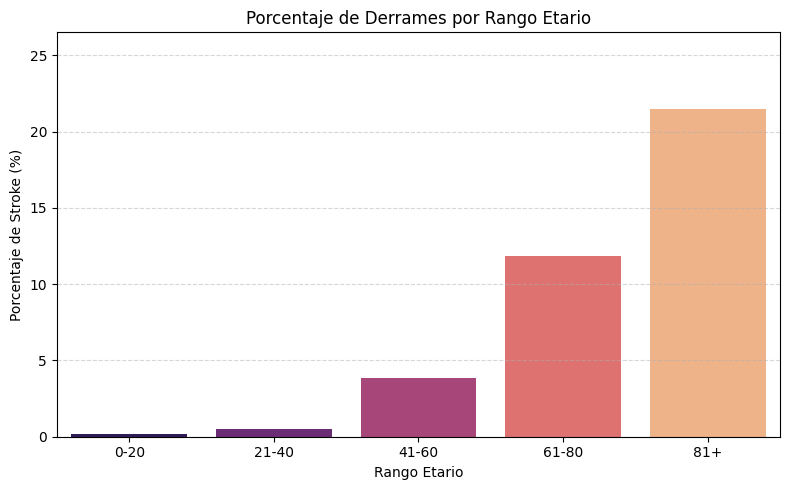

In [256]:
df_grafico = df.copy()


bins = [0, 20, 40, 60, 80, 120]
labels = ['0-20', '21-40', '41-60', '61-80', '81+']
df_grafico['rango_edad'] = pd.cut(df_grafico['age'], bins=bins, labels=labels, right=False)
porcentajes = df_grafico.groupby('rango_edad', observed=True)['stroke'].mean() * 100

df_barplot = porcentajes.reset_index(name='stroke_pct')

plt.figure(figsize=(8, 5))
sns.barplot(data=df_barplot, x='rango_edad', y='stroke_pct', hue='rango_edad', palette="magma", legend=False)
plt.title("Porcentaje de Derrames por Rango Etario")
plt.ylabel("Porcentaje de Stroke (%)")
plt.xlabel("Rango Etario")
plt.ylim(0, df_barplot['stroke_pct'].max() + 5)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
